In [29]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 

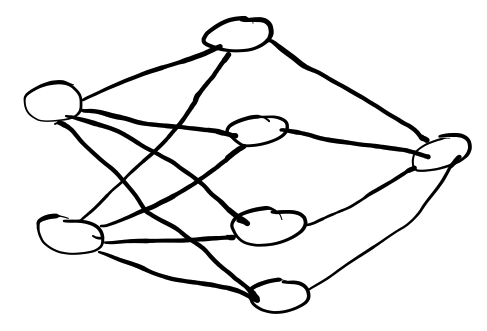

## Objects

In [132]:
class Neuron(object):
    
    def __init__(Neuron, activation, bias = 0):
        Neuron.activation = activation
        Neuron.bias = bias
    
    def activate(Neuron, x):
        if isinstance(x, (list, tuple, np.ndarray)):
            x = sum(x)
        if Neuron.activation == 'linear':
            return x + Neuron.bias
        if Neuron.activation == 'sigmoid':
            return sigmoid(x+Neuron.bias) 
        if Neuron.activation == 'tanh':
            return np.tanh(x+Neuron.bias)
        

In [133]:
n = Neuron('linear', 3)
n.activate(np.array([0, 1, 2]))

6

In [134]:
class Connection(object):
    
    def __init__(Connection, neuron_1, neuron_2):
        Connection.neuron_1 = neuron_1
        Connection.neuron_2 = neuron_2
        Connection.weight = random.uniform(0,1)
    
    def forward(Connection, x):
        return(Connection.weight*(x))
    

In [161]:
I = [Neuron('linear')]*4
O = [Neuron('sigmoid', 1)]*2
C = [Connection(I[0], O[0]), Connection(I[1], O[0]), Connection(I[2], O[0]), Connection(I[3], O[0]), Connection(I[1], O[1])]
X = [1, 2, 3, 4]
F = [C[i].forward(X[i]) for i in range(len(X))]
[O[i].activate(F) for i in range(len(O))]


[0.9964752532491494, 0.9964752532491494]

In [173]:
class Layer(object):
    def __init__(Layer, activation, size):
        Layer.neurons = [Neuron(activation)]*size           

In [181]:
class NeuralNetwork(object):
    def __init__(NeuralNetwork, layers):
        NeuralNetwork.layers = layers

In [183]:
nn = NeuralNetwork([Layer('linear', 2), Layer('sigmoid', 4), Layer('linear', 1)])

[0.8959632355331316,
 0.8959632355331316,
 0.8959632355331316,
 0.8959632355331316,
 0.8959632355331316]

In [97]:
sum(1)

TypeError: 'int' object is not iterable

In [18]:
class NN(object):

    def __init__(NN, X, Y, H):
        NN.X = X
        NN.Y = Y
        NN.W1 = np.random.randn(H, X.shape[1])/10.0
        NN.W2 = np.random.randn(H, 1)/10.0
        NN.cache = []
    
    def feed_forward(NN):
        S = sigmoid(NN.W1@np.transpose(NN.X))
        L = np.transpose(NN.W2)@S # linear output layer 
        NN.cache.append(S)
        NN.cache.append(L)
        return L
    
    def error(NN):
        Y_hat = NN.feed_forward()
        return np.linalg.norm(Y - Y_hat)/2.0
    
    def gradient_descent(NN):
        grad = -np.exp(-NN.W1)/(1 + np.exp(-NN.W1))**2
        NN.W1 = NN.W1 + (1/2)*grad
        NN.W2 = NN.W2 + NN.cache[0]

    def back_prop(NN):
        pass 


In [19]:
# Testing 
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0, 1, 1, 0]])
H = 3
nn = NN(X, Y, H)
for i in range (100):
    print(nn.error())
    nn.gradient_descent()

0.7649935682745328
1.038027678353824
1.8313156687969459
2.8296752110477588
3.776018379182259
4.65287048190419
5.472581091503221
6.250433448605261
6.999398387678615
7.7293282936935634
8.447332268375536
9.158394575390862
9.865941103564579
10.572283613821947
11.278947515425509
11.986907788171578
12.696757180616697
13.408825640488647
14.123264851268678
14.840107824042592
15.559310664418325
16.28078162306525
17.00440110243396
17.73003525942079
18.457545097511797
19.18679240220862
19.917643483805108
20.649971411057027
21.383657218139977
22.118590423632295
22.854669098053797
23.59179964404422
24.329896402097365
25.068881158760764
25.808682608974785
26.549235806619485
27.290481625122915
28.032366241571086
28.774840652017513
29.517860221819884
30.26138427226846
31.00537570311492
31.749800649581662
32.49462817183089
33.2398299745628
33.985380154294106
34.731254971876496
35.47743264790038
36.223893178762914
36.97061817133626
37.717590694340856
38.46479514469638
39.21221712728732
39.95984334673407

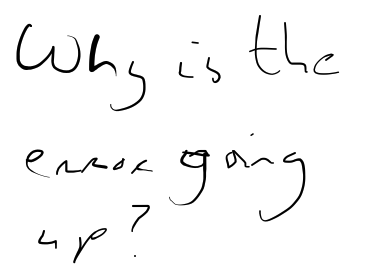

## Functions

### Activation Functions

In [4]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [5]:
print(sigmoid(1))
print(sigmoid(100))
print(sigmoid(-100))
print(sigmoid(np.array([[1, 2], [3, 4]])))

0.7310585786300049
1.0
3.7200759760208356e-44
[[0.73105858 0.88079708]
 [0.95257413 0.98201379]]


In [6]:
def tanh(x):
    return np.tanh(x)

In [7]:
print(tanh(1))
print(tanh(100))
print(tanh(-100))
print(tanh(np.array([[1, 2],[3, 4]])))

0.7615941559557649
1.0
-1.0
[[0.76159416 0.96402758]
 [0.99505475 0.9993293 ]]


In [8]:
def vis(name, A):
    """
    Takes a 2d numpy array and prints values to help visualize it.
    Input:
    A - numpy array 
    name - name of array
    """
    print(name, ' \n')
    print('Shape: ', A.shape[0], ' X ', A.shape[1],'\n')
    for i in range(A.shape[0]):
        print('| ', end='')
        for j in range(A.shape[1]):
            if j != A.shape[1]-1:
                print("{:6.2f}".format(A[i][j]), end=', ')
            else:
                print("{:6.2f}".format(A[i][j]), end='')
        print(' |')
    print('\n-----------------------------------------------')


In [9]:
A = np.array([[1, 2, 5], [3, 4, 1], [2, 4, 1.1]])
vis('A', A)

A  

Shape:  3  X  3 

|   1.00,   2.00,   5.00 |
|   3.00,   4.00,   1.00 |
|   2.00,   4.00,   1.10 |

-----------------------------------------------


In [10]:
def vis2(name, A):
    """
    Uses matplotlib to plot arrays
    """
    plt.matshow(A, cmap='plasma', interpolation='nearest')
    plt.title(name)
    plt.show()

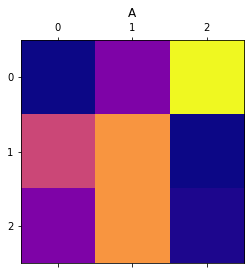

In [11]:
vis2('A', A)